Last updated: 15 Feb 2023

# 👋 PyCaret Regression Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [17]:
!pip install pycaret[full]
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -q Bike-Sharing-Dataset.zip

replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [18]:
# check installed version (must be >3.0)

import pycaret

pycaret.__version__

'3.2.0'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [19]:
### load sample dataset from pycaret dataset module

import pandas as pd
df = pd.read_csv('hour.csv')
df = df.drop(['casual', 'registered'], axis=1)

print(df.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81        0.0   16  
1           1  0.22  0.2727  0.80        0.0   40  
2           1  0.22  0.2727  0.80        0.0   32  
3           1  0.24  0.2879  0.75        0.0   13  
4           1  0.24  0.2879  0.75        0.0    1  


## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [63]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(df, target = 'cnt', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 15)"
5,Transformed train set shape,"(12165, 15)"
6,Transformed test set shape,"(5214, 15)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [64]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [65]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [66]:
# init setup on exp
exp.setup(df, target = 'cnt', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 15)"
5,Transformed train set shape,"(12165, 15)"
6,Transformed test set shape,"(5214, 15)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.
___

## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [24]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.7924,1579.2413,39.6573,0.9517,0.4229,0.4162,4.6800
xgboost,Extreme Gradient Boosting,25.7812,1731.7634,41.4958,0.9470,0.4384,0.4108,0.2800
et,Extra Trees Regressor,25.4045,1760.8952,41.8739,0.9461,0.3306,0.3031,3.4080
lightgbm,Light Gradient Boosting Machine,26.9083,1832.2569,42.7286,0.9439,0.4071,0.3991,0.9360
rf,Random Forest Regressor,27.4322,2054.7060,45.2461,0.9371,0.3500,0.3223,5.9670
dt,Decision Tree Regressor,35.4324,3514.0782,59.1033,0.8925,0.4381,0.3739,0.2230
gbr,Gradient Boosting Regressor,47.3275,4982.9980,70.4721,0.8476,0.6240,0.8473,1.5810
ada,AdaBoost Regressor,91.2784,12313.6629,110.9173,0.6221,1.0985,2.9021,0.9170
knn,K Neighbors Regressor,100.4764,19674.8599,140.2021,0.3972,1.1630,3.4291,0.1240
lr,Linear Regression,107.0915,20625.5317,143.5722,0.3680,1.2304,3.5175,0.6840


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
 #compare models using OOP
 #best1 = exp.compare_models()

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

___

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

YellowbrickAttributeError: ignored

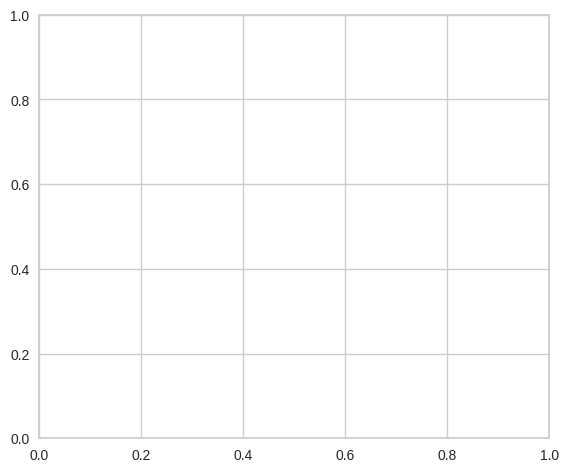

In [25]:
# plot residuals
plot_model(best, plot = 'residuals')

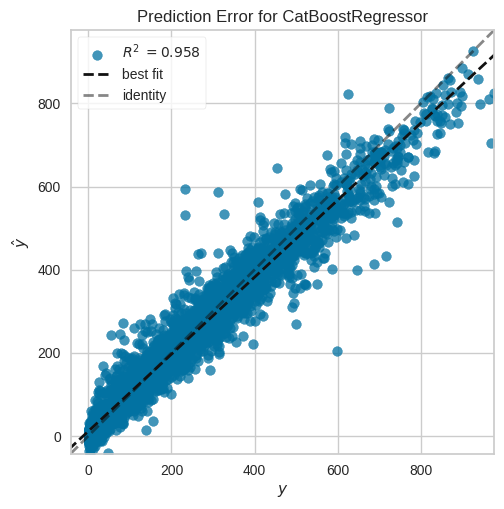

In [26]:
# plot error
plot_model(best, plot = 'error')

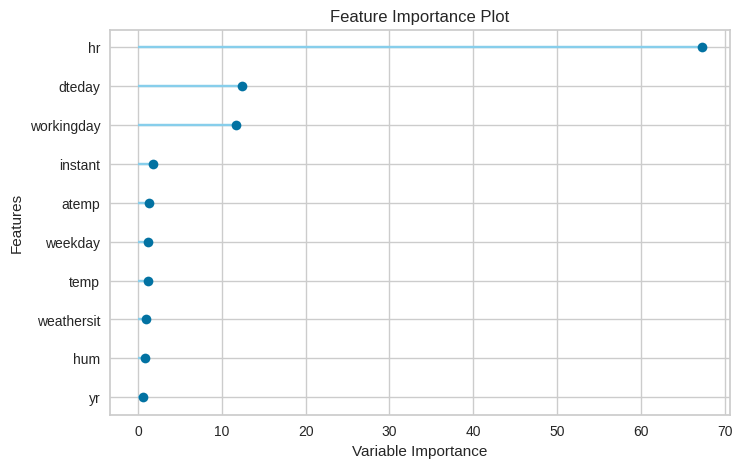

In [27]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [28]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [29]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,23.9564,1405.1161,37.4849,0.9579,0.4162,0.3926


In [30]:
# show predictions df
holdout_pred.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,5793,2011-09-03,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,244.056511
7823,7824,2011-11-27,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,327.959320
15426,15427,2012-10-09,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,103.586526
15028,15029,2012-09-23,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,309.858011
12290,12291,2012-06-01,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,325.770831


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [31]:
# copy data and drop charges

new_data = df.copy()
new_data.drop('cnt', axis=1, inplace=True)
new_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [32]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,prediction_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,33.578494
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,22.664949
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,13.704616
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.181031
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1.225079


___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [33]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                              'hr', 'holiday', 'weekday',
                                              'workingday', 'weathersit', 'temp',
                                              'atemp', 'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['dteday'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['dteday'],
                                     transformer=TargetEncoder(cols=['dteday'],
                                                               handle_missing='return_nan'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegress

In [34]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                             'hr', 'holiday', 'weekday',
                                             'workingday', 'weathersit', 'temp',
                                             'atemp', 'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['dteday'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['dteday'],
                                    transformer=TargetEncoder(cols=['dteday'],
                                                              handle_missing='return_nan'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x78d34a8f5ba0>)])

# 👇 Detailed function-by-function overview

## ✅ Setup
The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [67]:
s = setup(df, target = 'cnt', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 15)"
5,Transformed train set shape,"(12165, 15)"
6,Transformed test set shape,"(5214, 15)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [36]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [37]:
# lets access X_train_transformed
get_config('X_train_transformed')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
1859,1860.0,140.787433,2.0,0.0,3.0,6.0,0.0,3.0,1.0,2.0,0.34,0.3182,0.87,0.2537
7302,7303.0,171.259781,4.0,0.0,11.0,21.0,0.0,6.0,0.0,1.0,0.32,0.3485,0.66,0.0000
17094,17095.0,181.530950,4.0,1.0,12.0,1.0,0.0,4.0,1.0,1.0,0.32,0.3485,0.66,0.0000
17009,17010.0,172.727704,4.0,1.0,12.0,12.0,0.0,0.0,0.0,2.0,0.38,0.3939,0.82,0.1940
1636,1637.0,148.643823,1.0,0.0,3.0,17.0,0.0,0.0,0.0,1.0,0.44,0.4394,0.41,0.3582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97.0,130.712433,1.0,0.0,1.0,5.0,0.0,3.0,1.0,1.0,0.22,0.2273,0.47,0.1642
13435,13436.0,239.976981,3.0,1.0,7.0,0.0,0.0,4.0,1.0,1.0,0.74,0.6970,0.66,0.0896
7763,7764.0,163.323260,4.0,0.0,11.0,2.0,0.0,5.0,1.0,1.0,0.28,0.2879,0.81,0.1045
15377,15378.0,175.612433,4.0,1.0,10.0,22.0,0.0,0.0,0.0,1.0,0.38,0.3939,0.87,0.1343


In [68]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [60]:
# init setup with normalize = True
s = setup(df, target = 'cnt', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 15)"
5,Transformed train set shape,"(12165, 15)"
6,Transformed test set shape,"(5214, 15)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


<Axes: >

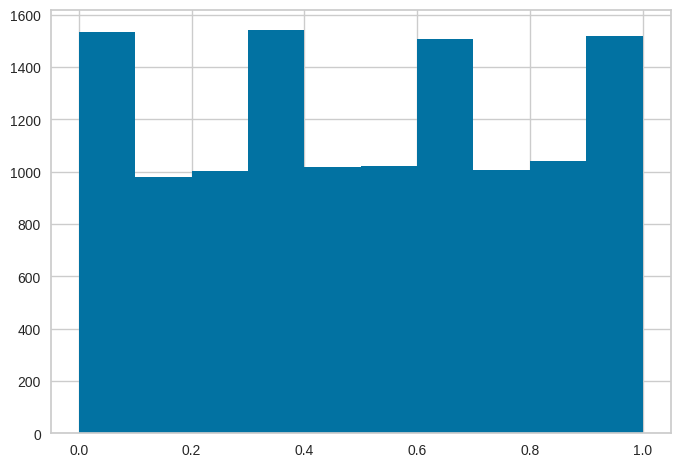

In [40]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['hr'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

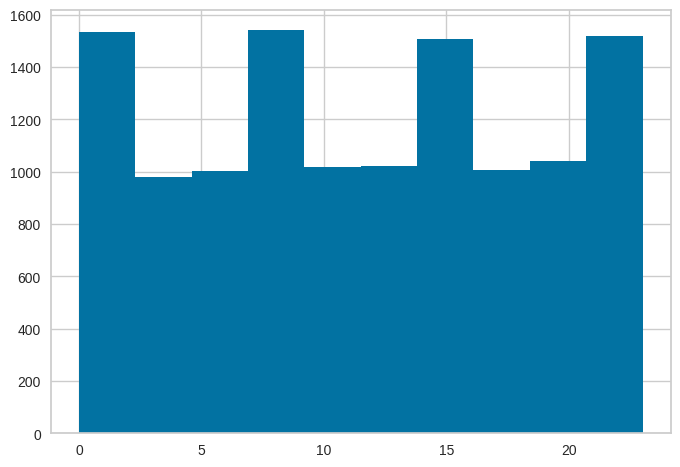

In [41]:
get_config('X_train')['hr'].hist()

___

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [42]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.7929,1579.2662,39.6576,0.9517,0.4229,0.4162,4.5930
xgboost,Extreme Gradient Boosting,25.7812,1731.7634,41.4958,0.9470,0.4384,0.4108,0.4650
et,Extra Trees Regressor,25.4027,1760.7231,41.8719,0.9461,0.3306,0.3030,3.3780
lightgbm,Light Gradient Boosting Machine,26.8971,1835.3993,42.7517,0.9438,0.4095,0.4059,0.8770
rf,Random Forest Regressor,27.4327,2055.0770,45.2492,0.9371,0.3502,0.3225,6.1000
dt,Decision Tree Regressor,35.4082,3511.3922,59.0774,0.8926,0.4374,0.3736,0.1670
gbr,Gradient Boosting Regressor,47.3284,4983.1482,70.4730,0.8476,0.6240,0.8473,1.5860
knn,K Neighbors Regressor,70.3894,11527.4096,107.2887,0.6472,0.8674,1.7650,0.2990
ada,AdaBoost Regressor,89.5090,11973.6863,109.3647,0.6326,1.0759,2.7629,0.7490
br,Bayesian Ridge,107.0446,20610.3425,143.5194,0.3684,1.2298,3.5162,0.0970


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [43]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [44]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.7929,1579.2662,39.6576,0.9517,0.4229,0.4162,4.5900
xgboost,Extreme Gradient Boosting,25.7812,1731.7634,41.4958,0.9470,0.4384,0.4108,0.2840
et,Extra Trees Regressor,25.4027,1760.7231,41.8719,0.9461,0.3306,0.3030,3.3840
lightgbm,Light Gradient Boosting Machine,26.8971,1835.3993,42.7517,0.9438,0.4095,0.4059,1.2780
rf,Random Forest Regressor,27.4327,2055.0770,45.2492,0.9371,0.3502,0.3225,5.8090
dt,Decision Tree Regressor,35.4082,3511.3922,59.0774,0.8926,0.4374,0.3736,0.2400
gbr,Gradient Boosting Regressor,47.3284,4983.1482,70.4730,0.8476,0.6240,0.8473,1.6060


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [47]:
compare_tree_models

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [48]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.7929,1579.2662,39.6576,0.9517,0.4229,0.4162,4.590
xgboost,Extreme Gradient Boosting,25.7812,1731.7634,41.4958,0.9470,0.4384,0.4108,0.284
et,Extra Trees Regressor,25.4027,1760.7231,41.8719,0.9461,0.3306,0.3030,3.384
lightgbm,Light Gradient Boosting Machine,26.8971,1835.3993,42.7517,0.9438,0.4095,0.4059,1.278
rf,Random Forest Regressor,27.4327,2055.0770,45.2492,0.9371,0.3502,0.3225,5.809
dt,Decision Tree Regressor,35.4082,3511.3922,59.0774,0.8926,0.4374,0.3736,0.240
gbr,Gradient Boosting Regressor,47.3284,4983.1482,70.4730,0.8476,0.6240,0.8473,1.606


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [49]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,24.7929,1579.2662,39.6576,0.9517,0.4229,0.4162,4.7880
et,Extra Trees Regressor,25.4027,1760.7231,41.8719,0.9461,0.3306,0.3030,3.3970
xgboost,Extreme Gradient Boosting,25.7812,1731.7634,41.4958,0.9470,0.4384,0.4108,0.2870
lightgbm,Light Gradient Boosting Machine,26.8971,1835.3993,42.7517,0.9438,0.4095,0.4059,0.5890
rf,Random Forest Regressor,27.4327,2055.0770,45.2492,0.9371,0.3502,0.3225,5.8350
dt,Decision Tree Regressor,35.4082,3511.3922,59.0774,0.8926,0.4374,0.3736,0.1630
gbr,Gradient Boosting Regressor,47.3284,4983.1482,70.4730,0.8476,0.6240,0.8473,1.6050
knn,K Neighbors Regressor,70.3894,11527.4096,107.2887,0.6472,0.8674,1.7650,0.1720
ada,AdaBoost Regressor,89.5090,11973.6863,109.3647,0.6326,1.0759,2.7629,1.0130
huber,Huber Regressor,102.1710,21196.2207,145.5246,0.3508,1.1631,2.8159,0.2510


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [50]:
# list of top 3 models by MAE
best_mae_models_top3

 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
  help(compare_models)

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [ ]:
!pip install mlflow --quiet

In [137]:
!mlflow --version

mlflow, version 1.30.1


In [135]:
from pycaret.regression import *

s = setup(df, target = 'cnt', log_experiment="mlflow", experiment_name='insurance_experiment')

ImportError: ignored

In [136]:
# compare models
 best = compare_models()

IndentationError: ignored

In [56]:
# start mlflow server on localhost:5000
# !mlflow ui
!mlflow ui --port 5000


[2023-12-01 15:24:06 +0000] [14567] [INFO] Starting gunicorn 20.1.0
[2023-12-01 15:24:06 +0000] [14567] [INFO] Listening at: http://127.0.0.1:5000 (14567)
[2023-12-01 15:24:06 +0000] [14567] [INFO] Using worker: sync
[2023-12-01 15:24:06 +0000] [14572] [INFO] Booting worker with pid: 14572
[2023-12-01 15:24:43 +0000] [14567] [INFO] Handling signal: int

Aborted!
[2023-12-01 15:24:43 +0000] [14572] [INFO] Worker exiting (pid: 14572)
[2023-12-01 15:24:44 +0000] [14567] [INFO] Shutting down: Master


By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [ ]:
# help(setup)

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [69]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [70]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,105.9623,19641.4560,140.1480,0.3733,1.2225,3.5948
1,109.1694,20863.0839,144.4406,0.3743,1.2570,3.4273
2,104.7558,20129.8475,141.8797,0.3975,1.2201,3.3559
3,109.8893,21553.6816,146.8117,0.3503,1.2285,3.2509
4,104.8432,19242.1291,138.7160,0.3489,1.2727,4.0360
5,103.2202,19522.9604,139.7246,0.3923,1.1890,3.5685
6,110.7312,22182.7380,148.9387,0.3400,1.1962,3.3157
7,108.3647,22124.7012,148.7437,0.3723,1.2652,3.5950
8,108.1891,20972.5747,144.8191,0.3410,1.2196,3.4446


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [71]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,105.9623,19641.4560,140.1480,0.3733,1.2225,3.5948
1,109.1694,20863.0839,144.4406,0.3743,1.2570,3.4273
2,104.7558,20129.8475,141.8797,0.3975,1.2201,3.3559
3,109.8893,21553.6816,146.8117,0.3503,1.2285,3.2509
4,104.8432,19242.1291,138.7160,0.3489,1.2727,4.0360
5,103.2202,19522.9604,139.7246,0.3923,1.1890,3.5685
6,110.7312,22182.7380,148.9387,0.3400,1.1962,3.3157
7,108.3647,22124.7012,148.7437,0.3723,1.2652,3.5950
8,108.1891,20972.5747,144.8191,0.3410,1.2196,3.4446


In [72]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,107.8283,20779.8147,144.1521,0.3652,1.2367,3.5180
1,107.8068,20740.7632,144.0165,0.3505,1.2297,3.6610
2,108.7146,21470.9279,146.5296,0.3561,1.2427,3.5753
Mean,108.1166,20997.1686,144.8994,0.3573,1.2364,3.5848
Std,0.4230,335.3775,1.1541,0.0061,0.0053,0.0587


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [73]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,105.2343,19372.3939,139.1847,0.3819,1.2248,3.7371
1,108.5567,20479.8820,143.1079,0.3858,1.2418,3.4744
2,103.9996,19781.6095,140.6471,0.4079,1.2046,3.4233
3,108.7900,21187.6459,145.5598,0.3613,1.2103,3.1842
4,103.7777,18736.0999,136.8799,0.3660,1.2642,3.9677
5,102.7780,19208.0133,138.5930,0.4021,1.1866,3.4492
6,109.3009,21622.3210,147.0453,0.3567,1.2059,3.3175
7,107.3821,21676.3369,147.2289,0.3851,1.2589,3.5584
8,107.3312,20649.2763,143.6986,0.3512,1.2192,3.3858


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [74]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [75]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.3689,3141.0920,56.0454,0.8998,0.4233,0.3612
1,33.6804,3070.2079,55.4095,0.9079,0.4399,0.3642
2,38.1454,4352.2260,65.9714,0.8697,0.4568,0.3999
3,38.1931,4409.6705,66.4053,0.8671,0.4400,0.3726
4,32.4478,2810.7338,53.0164,0.9049,0.4345,0.3751
5,33.9095,3064.9145,55.3617,0.9046,0.4318,0.3486
6,39.2599,4160.4391,64.5015,0.8762,0.4369,0.3800
7,34.3109,3270.5411,57.1886,0.9072,0.4372,0.3859
8,35.7903,3507.4285,59.2235,0.8898,0.4582,0.3795


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [76]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.3669,2689.0980,51.8565,0.9142,0.3924,0.3936
1,33.6396,2862.4087,53.5015,0.9141,0.4364,0.4212
2,36.0479,3584.7900,59.8731,0.8927,0.4276,0.4127
3,36.1410,3497.3864,59.1387,0.8946,0.4084,0.4003
4,30.9486,2475.3949,49.7533,0.9162,0.4304,0.4147
5,32.6933,3001.5926,54.7868,0.9066,0.4116,0.3914
6,35.9176,3427.2243,58.5425,0.8980,0.4252,0.4120
7,31.9539,2596.0245,50.9512,0.9264,0.4257,0.4274
8,32.8589,2976.4797,54.5571,0.9065,0.4243,0.4059


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [77]:
dt

DecisionTreeRegressor(random_state=123)

In [78]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.9970,3267.8471,57.1651,0.8957,0.4014,0.3465
1,33.8530,3000.9100,54.7806,0.9100,0.4250,0.3698
2,38.1080,4328.4315,65.7908,0.8704,0.4418,0.3979
3,36.4956,3847.3157,62.0267,0.8840,0.4041,0.3433
4,32.8726,2820.2685,53.1062,0.9046,0.4395,0.3910
5,33.7781,3125.3939,55.9052,0.9027,0.4031,0.3441
6,37.6017,4050.9587,63.6471,0.8795,0.4298,0.3792
7,33.5663,3100.9660,55.6863,0.9120,0.4099,0.3794
8,35.8546,3518.3061,59.3153,0.8895,0.4406,0.3787


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [79]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32.3669,2689.0980,51.8565,0.9142,0.3924,0.3936
1,33.6396,2862.4087,53.5015,0.9141,0.4364,0.4212
2,36.0479,3584.7900,59.8731,0.8927,0.4276,0.4127
3,36.1410,3497.3864,59.1387,0.8946,0.4084,0.4003
4,30.9486,2475.3949,49.7533,0.9162,0.4304,0.4147
5,32.6933,3001.5926,54.7868,0.9066,0.4116,0.3914
6,35.9176,3427.2243,58.5425,0.8980,0.4252,0.4120
7,31.9539,2596.0245,50.9512,0.9264,0.4257,0.4274
8,32.8589,2976.4797,54.5571,0.9065,0.4243,0.4059


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [80]:
# model object
tuned_dt

DecisionTreeRegressor(max_depth=13, max_features=1.0, min_impurity_decrease=0.4,
                      min_samples_leaf=5, min_samples_split=10,
                      random_state=123)

In [81]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['instant',
                                                                          'season',
                                                                          'yr',
                                                                          'mnth',
                                                                          'hr',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit',
                                                                          'temp',
                                                                          'atemp',
                                                                          'hum',
                                                                          'windspeed'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              Tran...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [82]:
#tune dt using optuna

tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,35.7855,3513.2314,59.2725,0.8879,0.3898,0.3521
1,33.5391,2975.8238,54.5511,0.9107,0.4032,0.3437
2,34.6203,3603.3367,60.0278,0.8921,0.3864,0.3361
3,34.0994,3087.3566,55.5640,0.9069,0.4037,0.3575
4,32.1288,2784.4971,52.7683,0.9058,0.4264,0.3710
5,32.7212,2740.9043,52.3536,0.9147,0.3885,0.3355
6,35.3065,3491.7964,59.0914,0.8961,0.4047,0.3568
7,31.2952,2545.2190,50.4502,0.9278,0.4269,0.3948
8,35.0199,3635.0539,60.2914,0.8858,0.4284,0.3726


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-12-01 15:31:24,376] Searching the best hyperparameters using 12165 samples...
[I 2023-12-01 15:33:06,698] Finished hyperparameter search!


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(tune_model)

## ✅ Ensemble Model

The `ensemble_model` function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [83]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28.8394,2100.8872,45.8354,0.9330,0.3482,0.3145
1,28.4065,2034.7199,45.1079,0.9390,0.3683,0.3352
2,30.3329,2785.9807,52.7824,0.9166,0.3707,0.3703
3,29.2038,2310.7231,48.0700,0.9303,0.3550,0.3235
4,26.3925,1831.4224,42.7951,0.9380,0.3728,0.3451
5,27.5683,2042.3481,45.1923,0.9364,0.3381,0.2970
6,30.0801,2453.9729,49.5376,0.9270,0.3539,0.3204
7,27.2584,2017.4696,44.9163,0.9428,0.3749,0.3471
8,29.2201,2397.1311,48.9605,0.9247,0.3712,0.3421


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [84]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28.7025,2090.5119,45.7221,0.9333,0.3316,0.2837
1,28.7634,2128.6845,46.1377,0.9362,0.3484,0.2973
2,29.3985,2529.8965,50.2981,0.9243,0.3563,0.3264
3,28.5144,2337.3952,48.3466,0.9295,0.3404,0.2889
4,26.5612,1835.9499,42.8480,0.9379,0.3621,0.3157
5,28.0041,2286.0469,47.8126,0.9288,0.3346,0.2733
6,30.8273,2733.5296,52.2832,0.9187,0.3542,0.3058
7,26.7352,2052.0263,45.2993,0.9418,0.3555,0.3054
8,29.6349,2594.8109,50.9393,0.9185,0.3692,0.3167


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)

## ✅ Blend Models

The `blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [89]:
# top 3 models based on mae
best_mae_models_top3

 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

In [86]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.6260,1380.5672,37.1560,0.9559,0.3622,0.3233
1,23.0852,1353.9351,36.7959,0.9594,0.3380,0.3074
2,23.6822,1675.2669,40.9300,0.9499,0.3647,0.3169
3,24.0115,1610.7355,40.1340,0.9514,0.3709,0.3209
4,21.3179,1131.8697,33.6433,0.9617,0.3732,0.3282
5,23.1445,1555.2257,39.4363,0.9516,0.3531,0.3071
6,26.1397,1909.1280,43.6936,0.9432,0.3540,0.3030
7,21.8652,1352.6119,36.7779,0.9616,0.3614,0.3191
8,24.1144,1613.6512,40.1703,0.9493,0.3513,0.3202


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x78d32b64d120>),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          earl...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=123, ...))],
                n_jobs=-1)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- weights
- optimize
- fit_kwargs
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(blend_models)

## ✅ Stack Models

The `stack_models` function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [114]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.2689,1334.6160,36.5324,0.9574,0.3831,0.3315
1,22.8463,1327.8655,36.4399,0.9602,0.3790,0.3045
2,23.6445,1643.4734,40.5398,0.9508,0.3747,0.3254
3,23.5195,1545.7384,39.3159,0.9534,0.3824,0.3153
4,21.2242,1103.1545,33.2138,0.9627,0.3836,0.3191
5,22.9146,1525.1184,39.0528,0.9525,0.3659,0.3025
6,25.6009,1839.0995,42.8847,0.9453,0.3737,0.3046
7,21.8714,1312.8966,36.2339,0.9628,0.3839,0.3420
8,23.7481,1538.1006,39.2186,0.9517,0.3964,0.3277


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x78d24e77c070>),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cp...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- restack
- optimize
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(stack_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

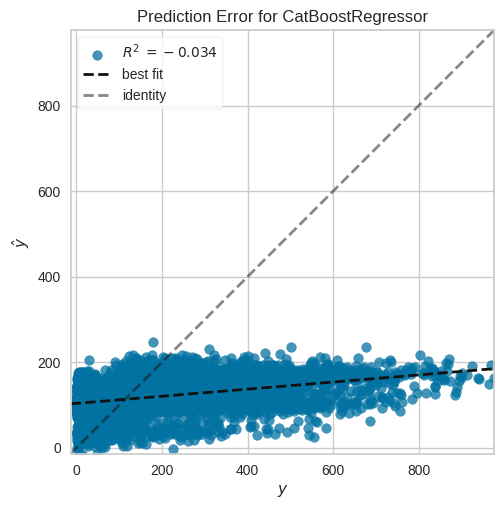

In [124]:
# plot residuals

plot_model(best, plot = 'error')

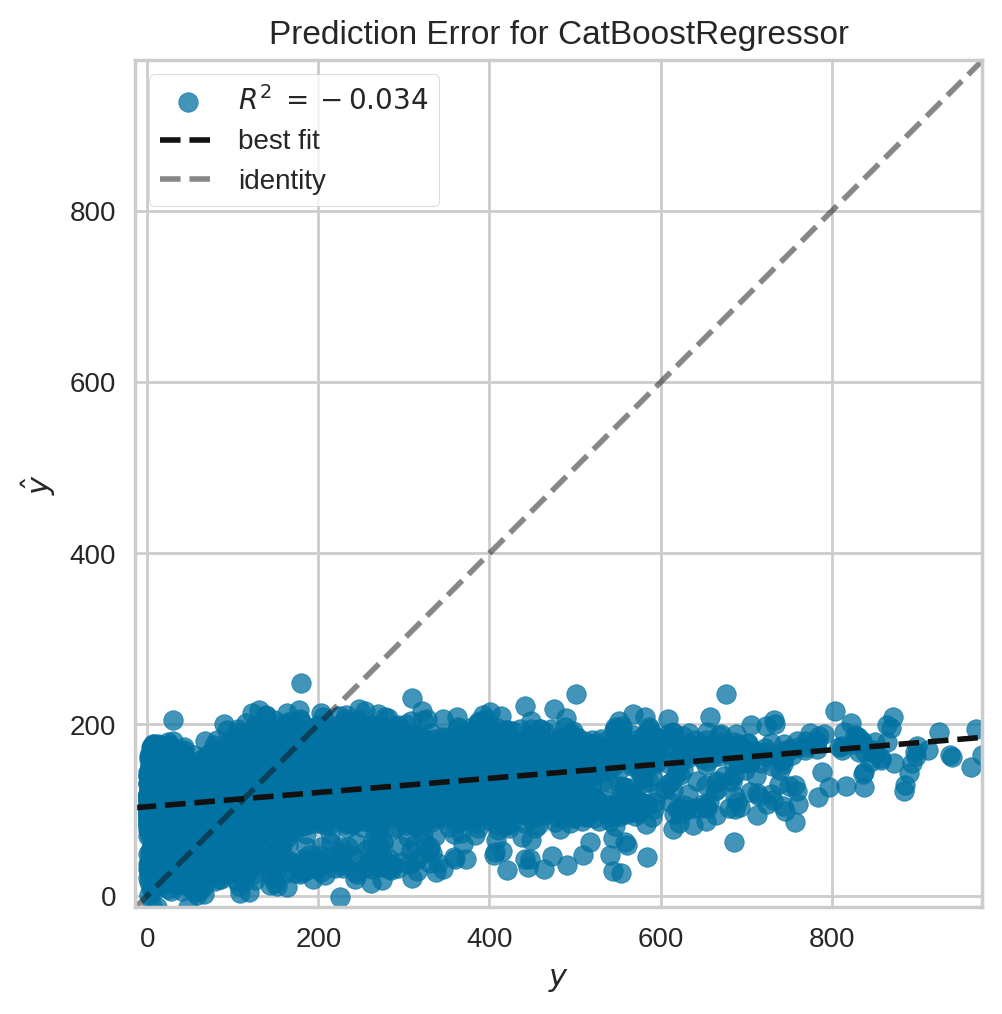

In [125]:
# to control the scale of plot
plot_model(best, plot = 'error', scale = 2)

In [126]:
# to save the plot
plot_model(best, plot = 'error', save=True)

'Prediction Error.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

The `interpret_model` function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [93]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.0274,1685.7954,41.0584,0.9462,0.3927,0.3926
1,26.8973,1697.5310,41.2011,0.9491,0.4112,0.3914
2,27.7810,1969.1234,44.3748,0.9411,0.4161,0.4179
3,26.8035,1864.3500,43.1781,0.9438,0.3925,0.3761
4,24.1671,1391.9967,37.3095,0.9529,0.3967,0.3893
5,26.2358,1851.3908,43.0278,0.9424,0.3963,0.3834
6,28.7655,2252.6706,47.4623,0.9330,0.4002,0.3876
7,25.6643,1721.1164,41.4863,0.9512,0.4229,0.4193
8,27.8212,1928.5539,43.9153,0.9394,0.4201,0.4249


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

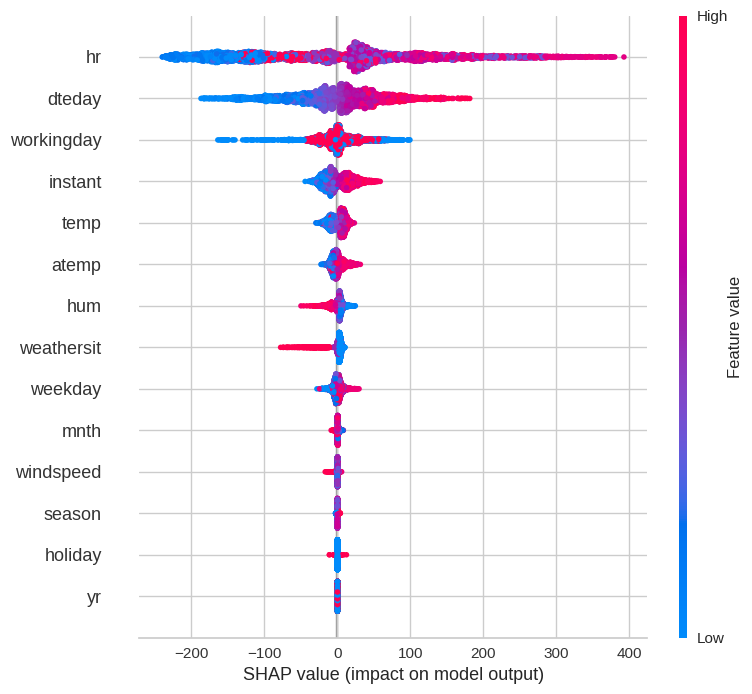

In [94]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [95]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [96]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/18 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['instant', 'seaso...",107.0915,20625.5317,143.5722,0.3680,1.2304,3.5175
1,Linear Regression,"(TransformerWrapper(include=['instant', 'seaso...",108.1166,20997.1686,144.8994,0.3573,1.2364,3.5848
2,Linear Regression,"(TransformerWrapper(include=['instant', 'seaso...",106.2325,20250.1974,142.2616,0.3795,1.2233,3.4989
4,Decision Tree Regressor,"(TransformerWrapper(include=['instant', 'seaso...",35.4324,3514.0782,59.1033,0.8925,0.4381,0.3739
5,Decision Tree Regressor,"(TransformerWrapper(include=['instant', 'seaso...",33.6048,3023.1147,54.8824,0.9074,0.4207,0.4117
6,Decision Tree Regressor,"(TransformerWrapper(include=['instant', 'seaso...",35.4324,3514.0782,59.1033,0.8925,0.4381,0.3739
7,Decision Tree Regressor,"(TransformerWrapper(include=['instant', 'seaso...",35.3027,3451.4204,58.6192,0.8943,0.4216,0.3719
8,Decision Tree Regressor,"(TransformerWrapper(include=['instant', 'seaso...",35.4324,3514.0782,59.1033,0.8925,0.4381,0.3739
9,Decision Tree Regressor,"(TransformerWrapper(include=['instant', 'seaso...",33.6048,3023.1147,54.8824,0.9074,0.4207,0.4117


In [97]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                             'hr', 'holiday', 'weekday',
                                             'workingday', 'weathersit', 'temp',
                                             'atemp', 'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['dteday'],
                                    transformer=SimpleImputer(strategy='most_frequent...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           random_state=123, ...))],
                                 n_jobs=-1)]])

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [98]:
# find best model based on CV metrics
automl()

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x78d2582b99f0>),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          earl...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=123, ...))],
                n_jobs=-1)

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [99]:
# dashboard function

dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅Create App
This function creates a basic gradio app for inference.

In [100]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://66ddaefcaeee838133.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [101]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [102]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [111]:
# check out the DockerFile file created with this magic command
 #%load DockerFile

In [113]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [127]:
final_best = finalize_model(best)

In [128]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                             'hr', 'holiday', 'weekday',
                                             'workingday', 'weathersit', 'temp',
                                             'atemp', 'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['dteday'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['dteday'],
                                    transformer=TargetEncoder(cols=['dteday'],
                                                              handle_missing='return_nan'))),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x78d24e135030>)])

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [106]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [107]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                              'hr', 'holiday', 'weekday',
                                              'workingday', 'weathersit', 'temp',
                                              'atemp', 'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['dteday'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['dteday'],
                                     transformer=TargetEncoder(cols=['dteday'],
                                                               handle_missing='return_nan'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegress

In [108]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                             'hr', 'holiday', 'weekday',
                                             'workingday', 'weathersit', 'temp',
                                             'atemp', 'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['dteday'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['dteday'],
                                    transformer=TargetEncoder(cols=['dteday'],
                                                              handle_missing='return_nan'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x78d254127880>)])

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [129]:
# save experiment
save_experiment('my_experiment')

In [134]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=df)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 15)"
5,Transformed train set shape,"(12165, 15)"
6,Transformed test set shape,"(5214, 15)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True
